# 测试集评估指标

In [4]:
import os
os.chdir('mmdetection')

In [5]:
os.getcwd()

'/mnt/openmmlab-Camp/03-mmdetection-tutorial/mmdetection'

In [7]:
!/root/miniconda3/envs/myconda/bin/python tools/test.py cat_dataset/cat_rtmdet_config.py work_dirs/cat_rtmdet_config/best_coco_bbox_mAP_epoch_40.pth

06/09 00:16:52 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.15 (default, Nov 24 2022, 15:19:38) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 1796322779
    GPU 0: NVIDIA A16
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.6, V11.6.124
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.12.1+cu116
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.6
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-ge

# 将测试的结果保存，深入分析

In [8]:
!/root/miniconda3/envs/myconda/bin/python tools/test.py cat_dataset/cat_rtmdet_config.py work_dirs/cat_rtmdet_config/best_coco_bbox_mAP_epoch_40.pth --show-dir results

06/09 00:27:40 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.15 (default, Nov 24 2022, 15:19:38) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 1327885958
    GPU 0: NVIDIA A16
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.6, V11.6.124
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.12.1+cu116
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.6
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-ge

In [9]:
# 会在 `work_dir/cat_rtmdet_config/当前时间戳/results/` 下生成测试图片，下面对前 8 张图片进行可视化

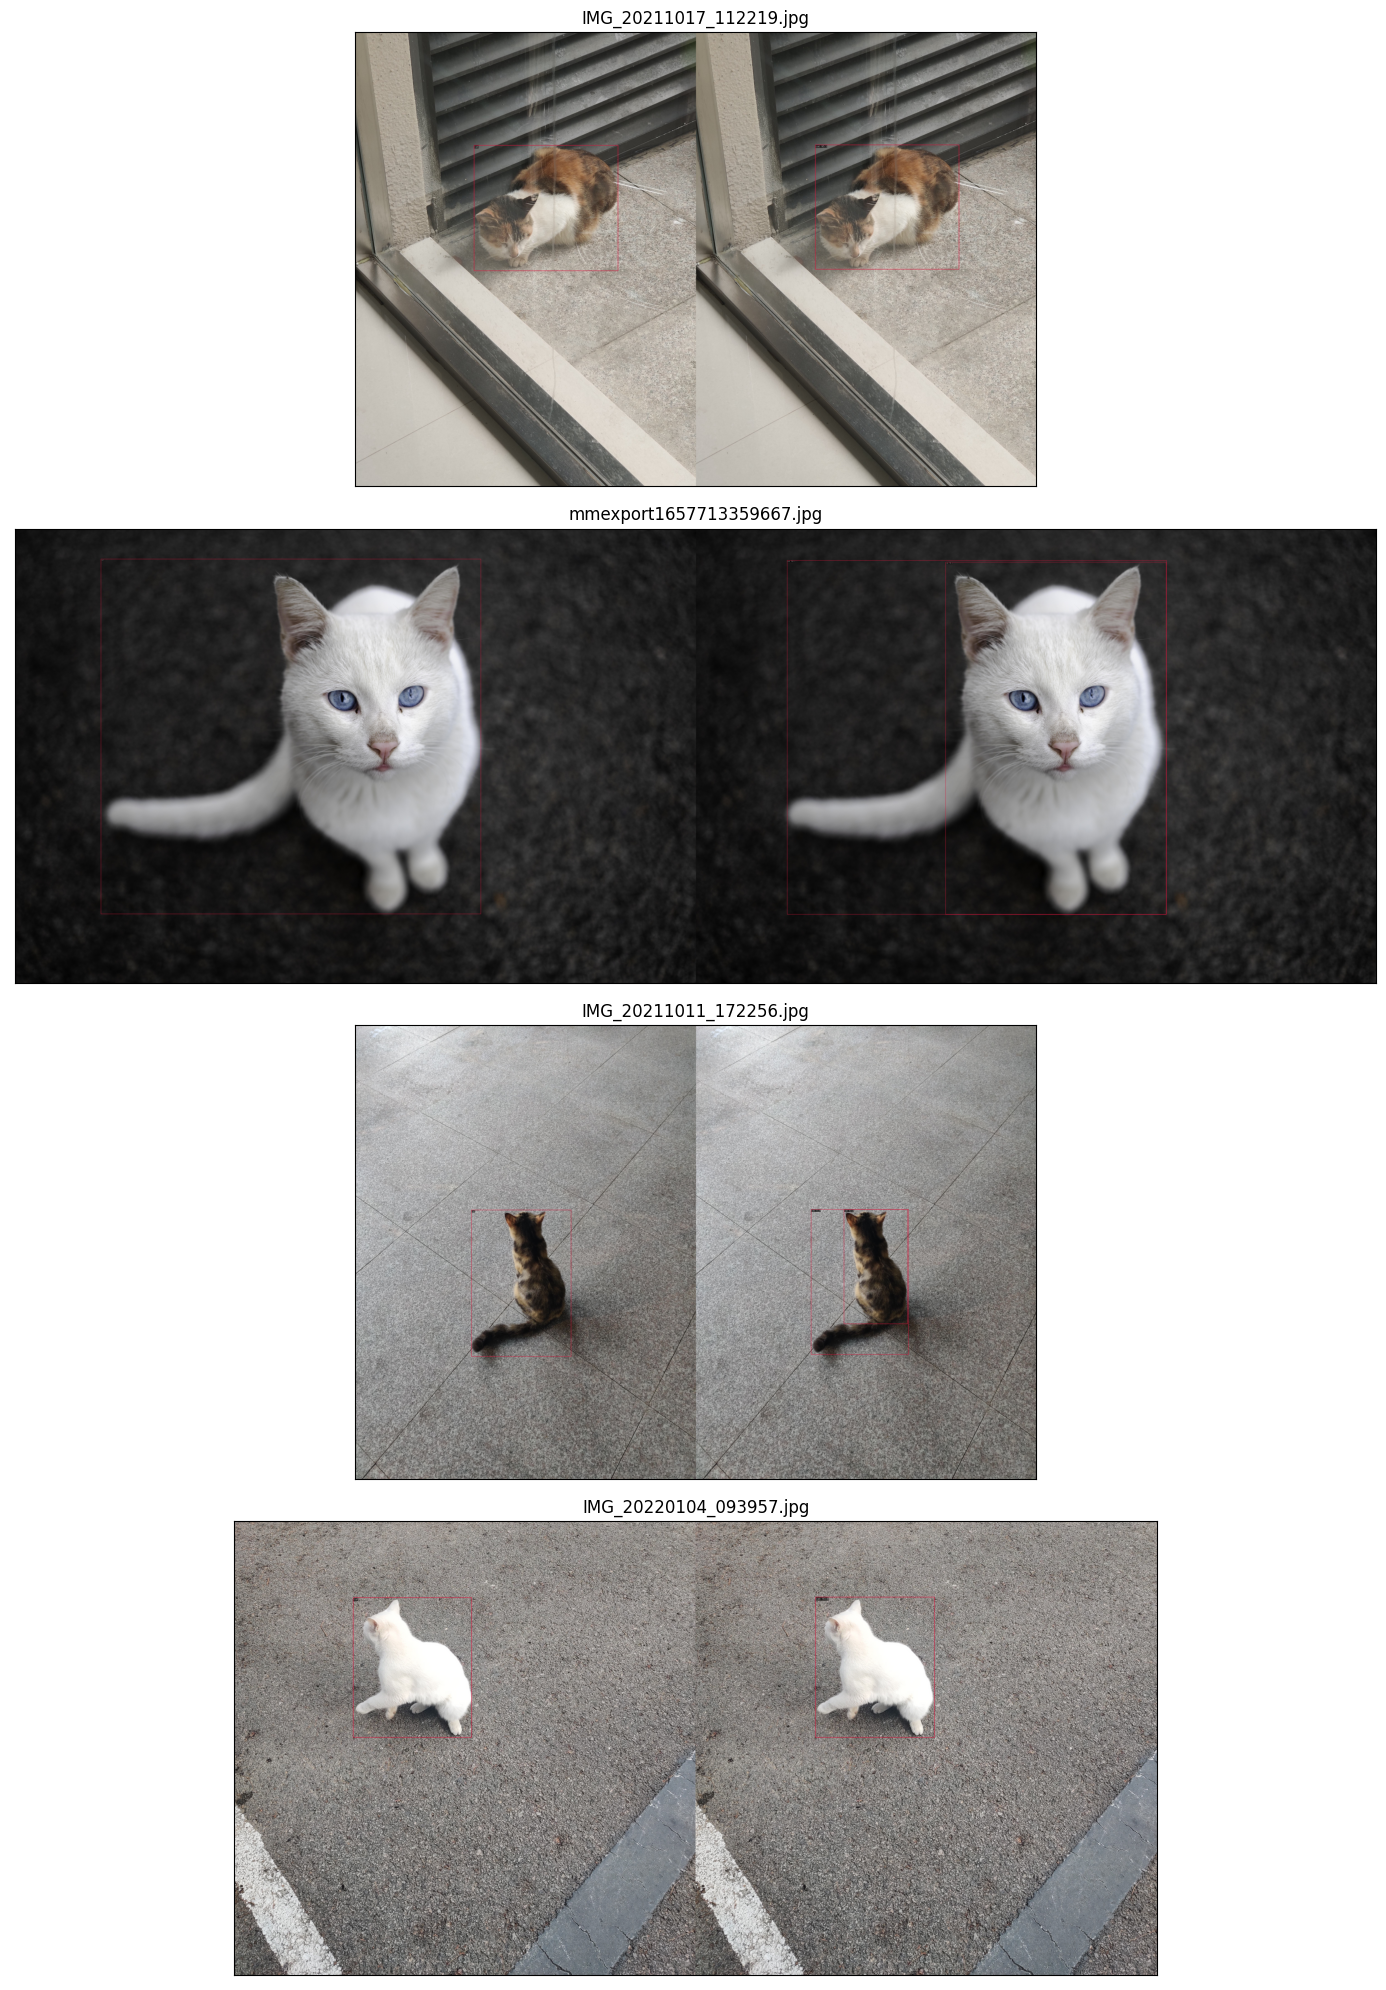

In [13]:
# 数据集可视化

import os
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

plt.figure(figsize=(20, 20))

# 你如果重新跑，这个时间戳是不一样的，需要自己修改
root_path='work_dirs/cat_rtmdet_config/20230609_002739/results/'
image_paths= [filename for filename in os.listdir(root_path)][:4]

for i,filename in enumerate(image_paths):
    name = os.path.splitext(filename)[0]

    image = Image.open(root_path+filename).convert("RGB")
  
    plt.subplot(4, 1, i+1)
    plt.imshow(image)
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

In [15]:
# 以上左侧是真实标注框，右侧是预测框